## Python ML Group - Week02. 다항 선형회귀

선형회귀에서는 주어진 피처 x 에 대해서 출력값(Y)가 선형관계를 갖는 것을 가정합니다.

하지만 x 에 대해서 비선형인 관계를 갖는 데이터도 존재합니다. 

자동차 속도에 대한 연비 데이터가 있다면 물리적으로 단순한 선형 관계는 아니라는 것을 알 수 있습니다.

이럴 때는 비선형 항을 추가해야 합니다.  비선형항에는 제곱근, 로그, 다항식(2차, 3차... ) 등을 사용할 수 있습니다. 

그래프를 보고 어떤 비선형 항이 들어갈 지를 정한 후에 기본 피처 x 데이터로부터 비선형항을 계산한 후에 새로운 추가 피처로 입력 데이터에 포함시켜서 선형회귀를 합니다.

실제 어떤 과정을 거치는지 실습해보겠습니다.


먼저 난수를 사용해서 비선형 모습을 한 데이터를 만들겠습니다.

In [42]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(137)

num = 100

x = np.random.uniform(0,10,num)

a = np.random.normal(1,3,num)
    
b = np.random.uniform(0,5,num)    

y = x **2 + 3* x * np.sin(x) + b ** 2

이 그래프의 모습은 어떤지 그래프를 그려서 확인해봅니다.

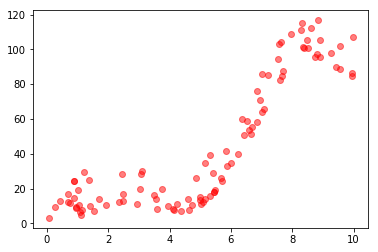

In [43]:
plt.plot(x, y, 'ro', alpha=0.5)
plt.show()

여기서는 다항식만 사용하기로 합니다.

그래프만 보면 4차 함수면 남득이 가는 회귀가 가능것 같은데 먼저 3차까지의 항을 만들어서 회귀를 해보겠습니다.

입력 데이터가 x 라면 $x^2$, $x^3$ 항을 만들어서 입력데이터에 포함시킵니다.

예를들어서 $x = [0, 1, 2, 3, 4, 5]$ 라면

$x2 = [0, 1, 4, 9, 16, 25]$

$x3 = [0, 1, 8, 27, 64, 125]$ 을 계산하고 

x, x2, x3 배열을 묶어서 (6 x 3) 행렬로 만들어서 피처의 갯수가 3인 데이터 세트를 만드는 것입니다.

이 과정을 그대로 실습해보겠습니다.

In [44]:
x1 = x         # 1차항
x2 = x ** 2    # 2차항
x3 = x ** 3    # 3차항

# x1,x2,x3 을 하나의 행렬로 만듭니다.
X = np.row_stack((x1,x2,x3)).T

print('새로운 X의 모양 : ', X.shape)

새로운 X의 모양 :  (100, 3)


다항데이터를 만드는 과정을 함수로 정의해서 사용하는 것이 편합니다.

In [45]:
def poly(x, n):
    assert n >= 1
    poly_term = [x]
    for i in range(n - 1):
        poly_term.append( x ** (i+2))
    poly_term = tuple(poly_term)
    return np.row_stack(poly_term).T

### 3차 회귀

원하는 3차항 데이터가 만들어졌으니 선형회귀를 해보고 그래프를 그려보겠습니다.

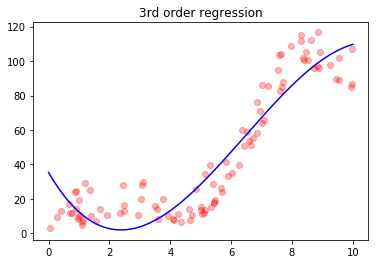

In [46]:
from sklearn.linear_model import LinearRegression
Y = y
lr = LinearRegression()
lr.fit(X, Y)

x_lin = np.linspace(0,10,200)
x_lin_poly = poly(x_lin, 3)

pred = lr.predict(x_lin_poly)

plt.plot(x, y, 'ro', alpha=0.3)
plt.plot(x_lin, pred, 'b-')
plt.title('3rd order regression')
plt.show()

조금더 고차항의 피처를 넣어주면 더 핏팅이 잘 될 것으로 생각됩니다.

코딩양을 줄이기 위해서 N 차원항까지 넣어서 회귀를 하고 그래프를 그려주는 함수를 정의하겠습니다.

In [58]:
def plot_poly(ax, X, Y, n_poly):
    from sklearn.metrics import mean_squared_error
    
    lr = LinearRegression()
    X_poly = poly(X, n_poly)
    lr.fit(X_poly, Y)
    pred_y = lr.predict(X_poly)
    cost = mean_squared_error(pred_y, Y)
    
    X_lin = np.linspace(np.min(X), np.max(X), 200)
    X_lin_poly = poly(X_lin, n_poly)
    pred = lr.predict(X_lin_poly)
    
    ax.plot(x, y, 'ro', alpha=0.3)
    ax.plot(x_lin, pred, 'b-')
    ax.set_title('{}th order regression'.format(str(n_poly)))
    ax.text(0,80,'cost : {:.2f}'.format(cost))

### 고차원 회귀

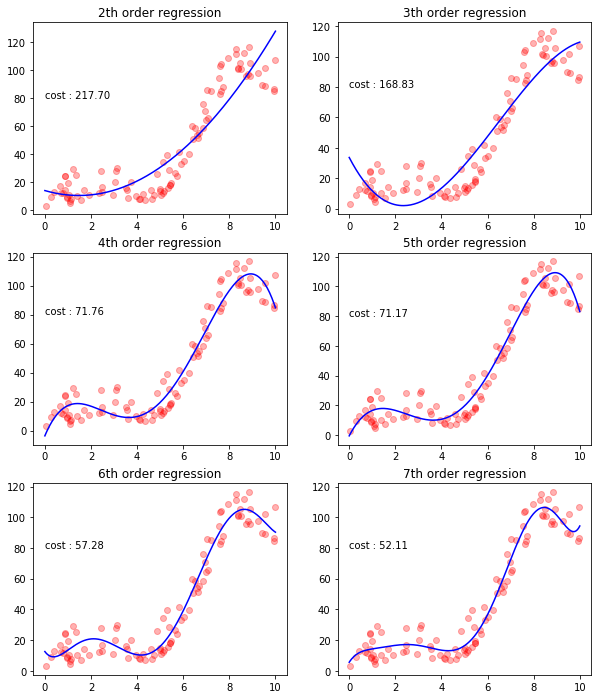

In [70]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,12))
ax = axes.flatten()
for i in range(len(ax)):
    plot_poly(ax[i], x, y, i+2)
plt.show()

고차원 회귀를 할 수록 비용값은 낮아지는 것을 확인할 수 있습니다.

물론 피팅 차원이 높아질 수록 오버피팅이되기 때문에 좋은 것이 아닙니다.